### Part 1 -- Outliers

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


cars_df = pd.read_csv('accord_sedan.csv')



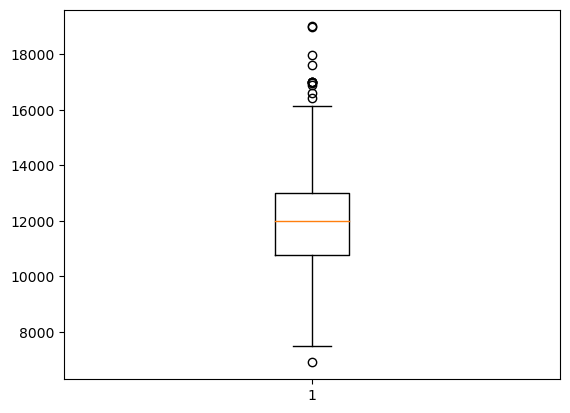

In [31]:
plt.boxplot(cars_df['price'])
plt.show()


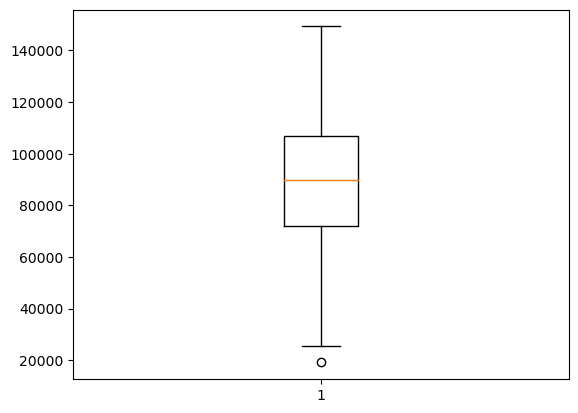

In [32]:
plt.boxplot(cars_df['mileage'])
plt.show()



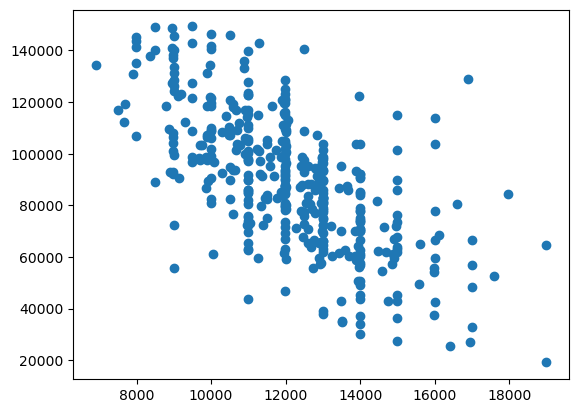

In [33]:
plt.scatter(cars_df['price'], cars_df['mileage'])
plt.show()



In [34]:
cars_df['isOutlierPrice'] = 0
cars_df['isOutlierMileage'] = 0

mean_price = cars_df['price'].mean()
std_price = cars_df['price'].std()

mean_mileage = cars_df['mileage'].mean()
std_mileage = cars_df['mileage'].std()

cars_df.loc[cars_df['price'] <= mean_price - (2*std_price), 'isOutlierPrice'] = 1
cars_df.loc[cars_df['price'] >= mean_price + (2*std_price), 'isOutlierPrice'] = 1
cars_df.loc[cars_df['mileage'] <= mean_mileage - (2*std_mileage), 'isOutlierMileage'] = 1
cars_df.loc[cars_df['mileage'] >= mean_mileage + (2*std_mileage), 'isOutlierMileage'] = 1




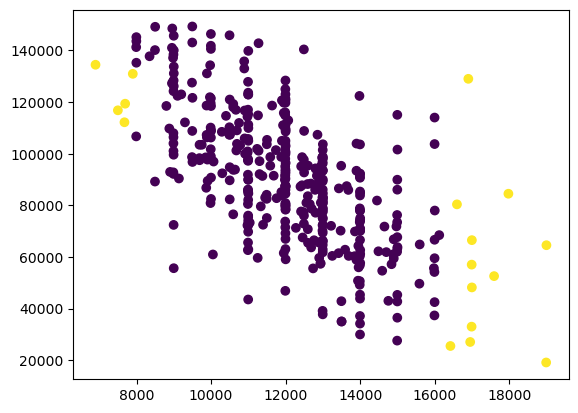

In [35]:
plt.scatter(cars_df['price'], cars_df['mileage'], c=cars_df.isOutlierPrice)
plt.show()



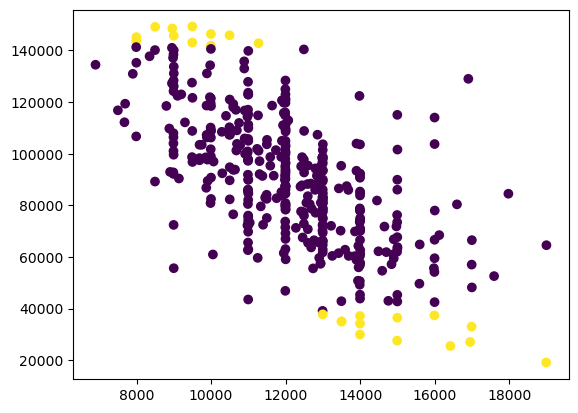

In [36]:
plt.scatter(cars_df['price'], cars_df['mileage'], c=cars_df.isOutlierMileage)
plt.show()




### Part 2 -- Q-Q Plots

<AxesSubplot:ylabel='Density'>

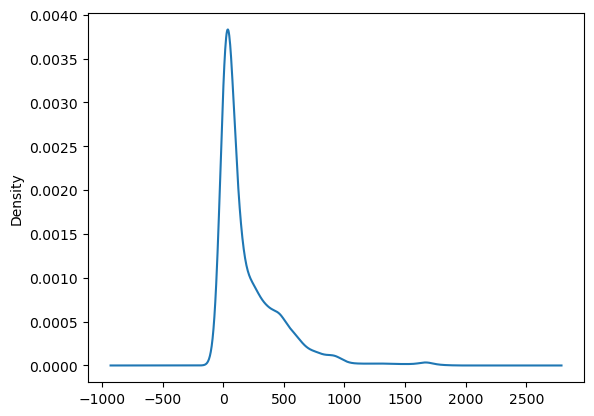

In [37]:
# Part 2 - Q-Q Plots

tb_df = pd.read_csv('TB_burden_countries_2014-09-29.csv')

tb_df['e_prev_100k'].plot(kind='kde')

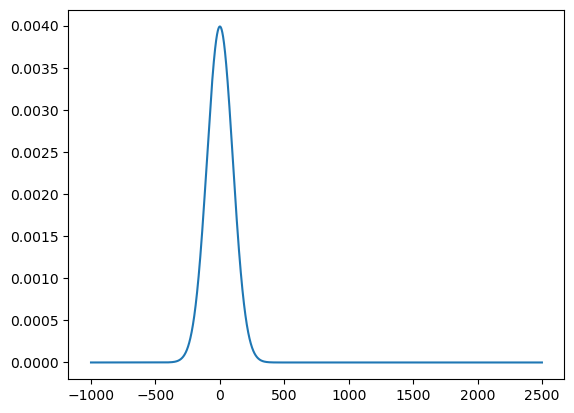

In [38]:
from scipy.stats import norm
x = np.arange(-1000, 2500)

plt.plot(x, norm.pdf(x, 0, 100))

They look similar. 

### Part 3 -- Distributions & Sampling & Robust Statistics

In [68]:
dist1 = np.random.normal(0, 0.2, 5)
dist1

array([-0.06862616,  0.15727165,  0.16005505, -0.18100186, -0.20286373])

In [69]:
dist2 = np.random.normal(0, 0.2, 10)
dist2

array([-0.09601474, -0.08836359,  0.06091791,  0.29560671,  0.11304921,
       -0.02600251,  0.03823882,  0.19200172,  0.12303328, -0.20196587])

In [70]:
dist3 = np.random.normal(0, 0.2, size=100)
dist3

array([-0.07172146,  0.06934606,  0.25261665, -0.276946  , -0.04798716,
        0.05188241, -0.14798477,  0.0350354 ,  0.16164052,  0.02347503,
       -0.23794147, -0.05602873,  0.16805466,  0.06665168, -0.09807969,
        0.22282364, -0.19854303, -0.38853817, -0.1093743 , -0.19070946,
        0.1268703 ,  0.28238445,  0.38227111,  0.04796476,  0.25186847,
       -0.14666501,  0.0610526 , -0.01821399, -0.04192786,  0.14670669,
        0.27844813,  0.00504676, -0.25413433,  0.06442007, -0.01860578,
       -0.06064528, -0.14490128,  0.00082259, -0.35175152, -0.21576559,
       -0.15606385, -0.27330448,  0.23526739, -0.00374447, -0.06243816,
        0.10508944, -0.16286921, -0.18177907, -0.10622936, -0.01126473,
       -0.02339864, -0.03135431, -0.20372117, -0.01610487,  0.21425484,
       -0.14221944,  0.05460345,  0.0006588 ,  0.06289783,  0.01874733,
        0.17079162,  0.04500299,  0.161745  ,  0.1939774 ,  0.05801041,
        0.14464083,  0.13048244, -0.152884  , -0.17263287,  0.08

In [71]:
dist4 = np.random.normal(0, 1, 5)
dist4

array([-0.33844213,  1.16601572,  0.5292485 ,  0.61101747,  1.2090118 ])

In [72]:
dist5 = np.random.normal(0, 1, 10)
dist5

array([-0.41907431,  1.29709742,  0.30011839,  2.14691248,  0.03347049,
        0.44997566, -0.89045056,  2.38748531, -0.83523389, -0.42091329])

In [73]:
dist6 = np.random.normal(0, 1, 100)
dist6

array([-1.47641904,  0.53829126,  0.82656226, -1.34563342, -0.65987798,
        0.55627919,  0.65991395, -1.52148183, -0.79473792, -0.31108384,
        0.31863286, -0.30341745,  0.51334552,  0.1158111 , -0.15942881,
        2.36830444, -1.11039125, -0.91018318, -0.32228039, -1.04378044,
       -0.65515888, -2.00991774, -0.76363046, -0.13991141,  0.08070891,
        1.92526525, -0.58973583, -0.71398657, -2.93268559, -0.50546305,
        1.34927553, -1.25273884,  0.98032165,  0.13044021, -1.04356676,
       -0.72716816, -0.03394612,  0.42432233, -0.24587276,  1.04078543,
        1.84994359,  1.16785044, -2.59261257, -1.45961483,  1.37094276,
       -2.6243541 ,  1.12798441, -0.90074742, -0.34057379, -0.38766868,
        0.24389507,  0.69873832, -0.64180003, -0.1435524 ,  0.69824637,
        0.70244669, -0.65622931, -0.40973413,  1.45647015,  0.49340506,
       -0.74692003,  0.36581304,  0.28107375, -1.01461021,  0.65898423,
        0.43187652,  0.53654804,  0.17669379, -0.69269458, -0.22

In [74]:
dist7 = np.random.normal(0, 5, 5)
dist7

array([  3.13321575,   8.89479191,  -2.92402344,   4.77831514,
       -11.66957282])

In [75]:
dist8 = np.random.normal(0, 5, 10)
dist8

array([-0.73438614, -6.34595917, -3.89946759,  0.10990215, -7.12952317,
        2.27890347,  4.06508365, -2.13709207, -1.65494476,  4.92968215])

In [76]:
dist9 = np.random.normal(0, 5, 100)
dist9

array([ -0.17297694,   2.98771397,   0.57679991, -12.21294123,
        -0.18986636,  -0.68109802,  -0.79559585,  11.61467484,
        -8.61315208,   1.01495099,   3.35470258,   4.48631222,
         9.23761592,   0.46518624,   2.26394329,   7.38055645,
        -6.43245693,  -2.45658612,  -7.35506669,   4.00236994,
        -3.95139507,  -4.11798711,  -3.98839789,   6.68474447,
         1.36113086,  -5.60712775,  -3.04961449,   5.90392769,
         3.36923883,   7.3782316 ,   2.742649  ,   9.23297511,
         0.14282291,   0.44108723,   4.7091192 ,   7.30526663,
         3.11791079,   5.19443776,   6.48910489,   4.90346193,
         1.68723012,   0.35211284,   0.03813549,  -5.99367226,
         1.59696276,  -0.64085996,  -3.80683947,  -1.92816006,
         8.15678382,   0.69675754,  -3.50803858,  -7.44150002,
        13.19424671,  -2.74688534,   6.23290818,   1.56007055,
         3.83377655,   2.04061071,  -4.82002023,   0.40650661,
         4.83224697,  -2.2818773 ,   6.84870253,   7.43

In [77]:
# statistics: 

from scipy.stats import skew, kurtosis

# dist1 
print('dist1: n=5, s=0.2')
print(dist1.mean())
print(dist1.std())
print(skew(dist1))
print(kurtosis(dist1))

# dist2
print('dist2: n=10, s=0.2')
print(dist2.mean())
print(dist2.std())
print(skew(dist2))
print(kurtosis(dist2))

# dist3
print('dist3: n=100, s=0.2')
print(dist3.mean())
print(dist3.std())
print(skew(dist3))
print(kurtosis(dist3))

# dist4
print('dist4: n=5, s=0.5')
print(dist4.mean())
print(dist4.std())
print(skew(dist4))
print(kurtosis(dist4))

# dist5
print('dist5: n=10, s=0.5')
print(dist5.mean())
print(dist5.std())
print(skew(dist5))
print(kurtosis(dist5))

# dist6
print('dist6: n=100, s=0.5')
print(dist6.mean())
print(dist6.std())
print(skew(dist6))
print(kurtosis(dist6))

# dist7
print('dist7: n=5, s=5')
print(dist7.mean())
print(dist7.std())
print(skew(dist7))
print(kurtosis(dist7))

# dist8
print('dist8: n=10, s=5')
print(dist8.mean())
print(dist8.std())
print(skew(dist8))
print(kurtosis(dist8))

# dist9
print('dist9: n=100, s=5')
print(dist9.mean())
print(dist9.std())
print(skew(dist9))
print(kurtosis(dist9))

dist1: n=5, s=0.2
-0.027033011256170296
0.15831802850857482
0.18400790338058717
-1.7584919974240845
dist2: n=10, s=0.2
0.04105009298722421
0.14106051665222513
0.05241279462721181
-0.7441412511786103
dist3: n=100, s=0.2
0.0011570401071015002
0.16298408718537122
-0.1607816153291149
-0.46364761919817177
dist4: n=5, s=0.5
0.6353702727422778
0.5605023967296753
-0.6661395288851283
-0.7973419926661776
dist5: n=10, s=0.5
0.4049387707050428
1.1175421913160175
0.6113249795887663
-0.9857696332363739
dist6: n=100, s=0.5
-0.18711432551995244
0.9795689054810695
-0.16357379756075846
0.23101684342792472
dist7: n=5, s=5
0.44254530774620343
7.148654010985972
-0.6078104972526354
-0.9200111699867142
dist8: n=10, s=5
-1.0517801488631962
3.8616344918066163
-0.01903144118213303
-1.0628064744606176
dist9: n=100, s=5
0.8452321536462781
5.447965512739675
0.18779141593889428
0.3776263810532856
